## Step 3: Quasi-equiareal spherical parameterization of a genus-0 surface, $S_{ref}(x,y,z)$ 

Whilst any genus-0 surface can be mapped to a sphere minimizing conformal error, it can be at the expense of shrinking surface features to point-like singularities. For this detrimentally affects the representation of high curvature surface protrusions on the sphere. 

This workbook will walk through our area-distortion relaxation scheme which adapts the approach of [Lee et al.](https://www.cs.jhu.edu/~misha/MyPapers/SGP19.pdf), to relax distortion on the sphere and can achieve near-ideal area-distortion minimisation.


### Load $S_{ref}(x,y,z)$  and $S_{\mathcal{Q}(x,y,z)}$ mesh and create an analysis save folder

We assume the user has worked through step 2 which generates and saves the conformal parameterization $S_{\mathcal{Q}}(x,y,z)$ of the genus-0 reference surface for an input cell surface mesh to the folder `example_results/bleb_example/step2_confocal_sphere_param`. We also need the reference surface from step 1 saved to the folder `example_results/bleb_example/step1_cMCF_reference`. Moreover these surface has been colored by curvature or molecular intensity. 

In [3]:
import unwrap3D.Utility_Functions.file_io as fio
import unwrap3D.Mesh.meshtools as meshtools
import numpy as np
import os 
import scipy.io as spio

# example cell used
imgfolder = 'example_data/img'
imgfile = os.path.join(imgfolder, 'bleb_example.tif')
basefname = os.path.split(imgfile)[-1].split('.tif')[0] # get the filename with extension

# create the analysis save folder for this step
savefolder = os.path.join('example_results', 
                         basefname,
                         'step4_uv_mapping')
fio.mkdir(savefolder) # auto generates the specified folder structure if doesn't currently exist.


# load the pre-computed genus-0 reference, S_ref(x,y,z)
S_ref_folder = 'example_results/%s/step1_cMCF_reference' %(basefname)
S_ref_file = os.path.join(S_ref_folder, 
                            'unwrap_cMCF_Sref_mesh_H_color.obj') 
S_ref_mesh = meshtools.read_mesh(S_ref_file)

# load the pre-computed genus-0 spherical parameterization of S_ref(x,y,z)
conformal_folder = 'example_results/%s/step2_confocal_sphere_param' %(basefname)
conformal_file = os.path.join(conformal_folder, 
                               'conformal_sphere_param_Sref_%s.obj' %(basefname))
conformal_sphere_mesh = meshtools.read_mesh(conformal_file)

### Equiareal spherical parameterization of  $S_{ref}(x,y,z)$  mesh by relaxation to get $S_{\Omega}(x,y,z)$

To relax area distortion, we can compute the area fraction of the current spherical parameterization and $S_{ref}$. We can think of this as a sort of energy and advect the vertices on the sphere to maximally dissipate this energy over the surface. As this dissipation necessarily requires changing the triangle edge lengths, minimizing area distortion is in direct opposition to minimizing conformal error. 

Depending on the intended application, the user does not need to fully relax the area. For this reason we chose to implement an iterative relaxation scheme.

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

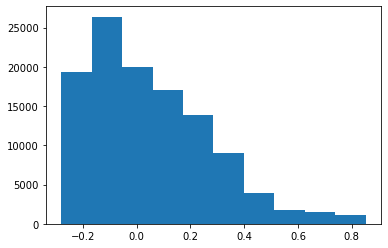

  2%|█▋                                                                                 | 1/50 [00:06<05:37,  6.89s/it]

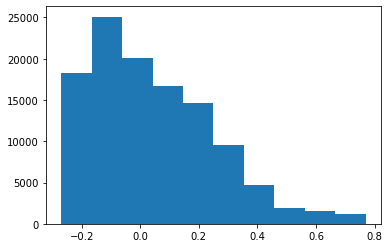

  4%|███▎                                                                               | 2/50 [00:14<05:40,  7.10s/it]

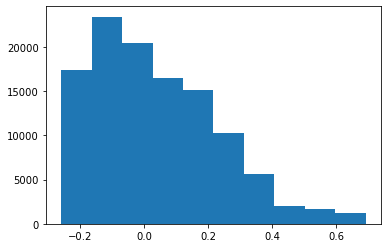

  6%|████▉                                                                              | 3/50 [00:21<05:31,  7.06s/it]

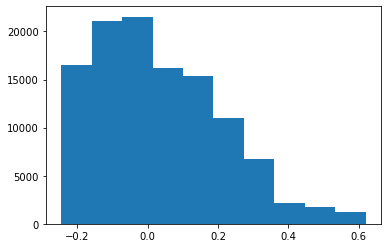

  8%|██████▋                                                                            | 4/50 [00:28<05:25,  7.08s/it]

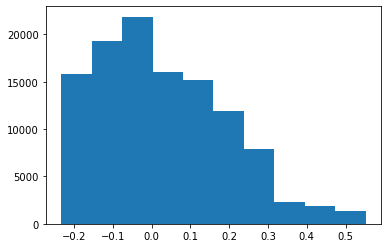

 10%|████████▎                                                                          | 5/50 [00:36<05:29,  7.33s/it]

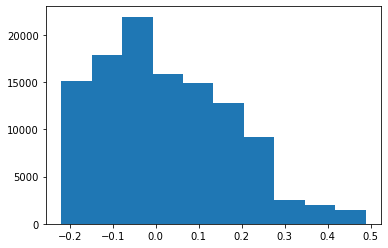

 12%|█████████▉                                                                         | 6/50 [00:45<05:49,  7.94s/it]

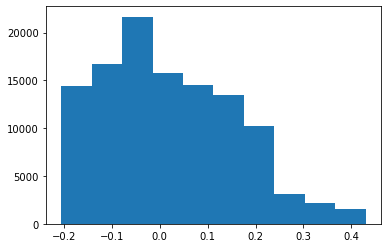

 14%|███████████▌                                                                       | 7/50 [00:52<05:26,  7.60s/it]

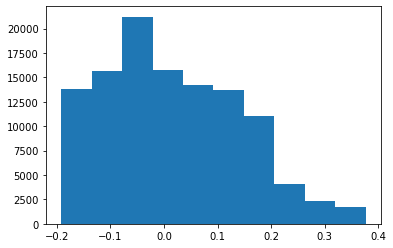

 16%|█████████████▎                                                                     | 8/50 [00:59<05:13,  7.48s/it]

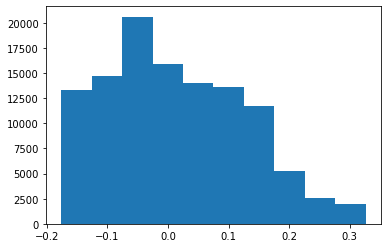

 18%|██████████████▉                                                                    | 9/50 [01:06<05:06,  7.48s/it]

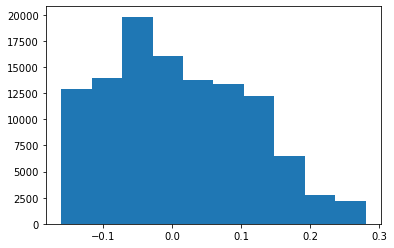

 20%|████████████████▍                                                                 | 10/50 [01:14<04:59,  7.49s/it]

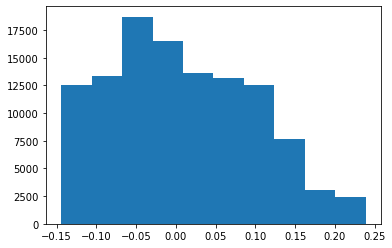

 22%|██████████████████                                                                | 11/50 [01:22<04:55,  7.59s/it]

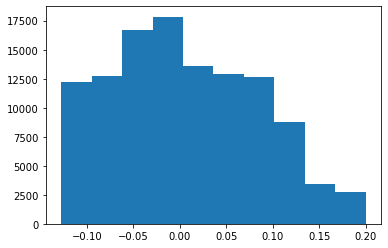

 24%|███████████████████▋                                                              | 12/50 [01:29<04:50,  7.65s/it]

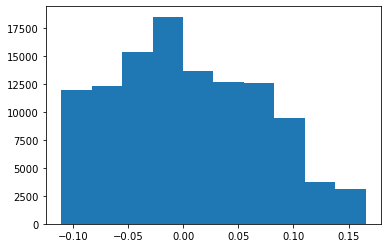

 26%|█████████████████████▎                                                            | 13/50 [01:37<04:42,  7.64s/it]

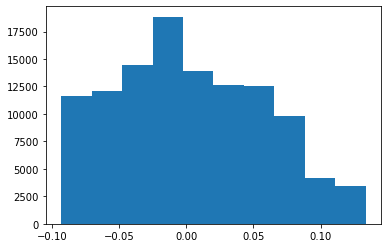

 28%|██████████████████████▉                                                           | 14/50 [01:45<04:35,  7.65s/it]

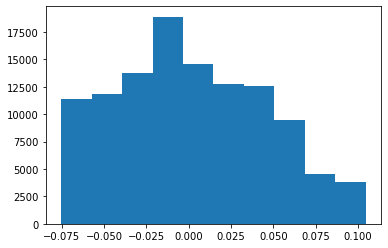

 30%|████████████████████████▌                                                         | 15/50 [01:53<04:31,  7.75s/it]

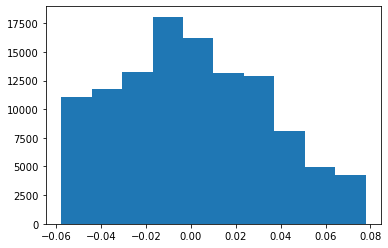

 32%|██████████████████████████▏                                                       | 16/50 [02:01<04:29,  7.93s/it]

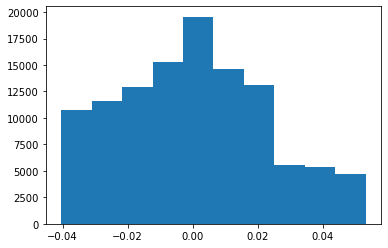

 34%|███████████████████████████▉                                                      | 17/50 [02:10<04:33,  8.29s/it]

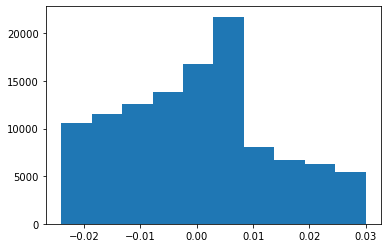

 36%|█████████████████████████████▌                                                    | 18/50 [02:19<04:29,  8.43s/it]

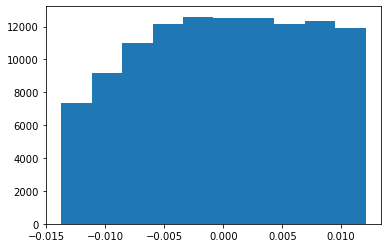

 38%|███████████████████████████████▏                                                  | 19/50 [02:26<04:12,  8.15s/it]

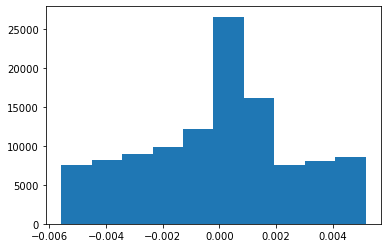

 40%|████████████████████████████████▊                                                 | 20/50 [02:33<03:52,  7.74s/it]

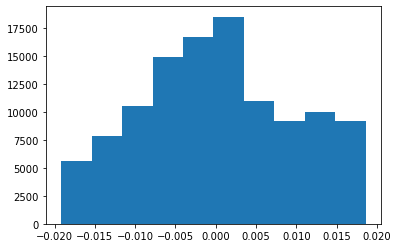

 42%|██████████████████████████████████▍                                               | 21/50 [02:41<03:44,  7.73s/it]

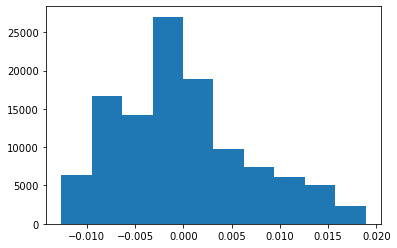

 44%|████████████████████████████████████                                              | 22/50 [02:50<03:44,  8.00s/it]

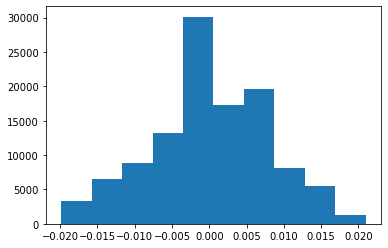

 46%|█████████████████████████████████████▋                                            | 23/50 [02:57<03:32,  7.85s/it]

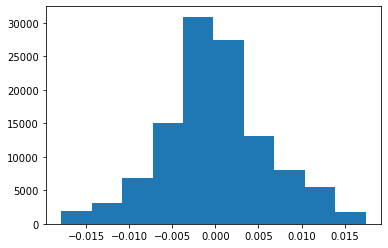

 48%|███████████████████████████████████████▎                                          | 24/50 [03:04<03:20,  7.72s/it]

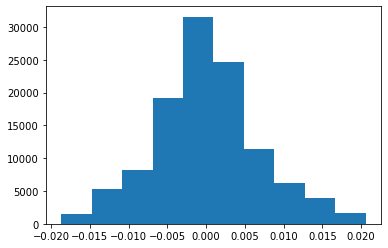

 50%|█████████████████████████████████████████                                         | 25/50 [03:11<03:05,  7.44s/it]

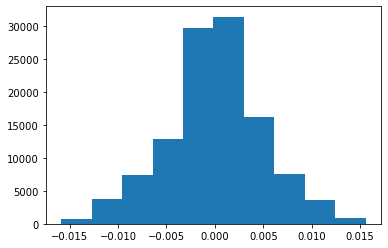

 52%|██████████████████████████████████████████▋                                       | 26/50 [03:18<02:57,  7.39s/it]

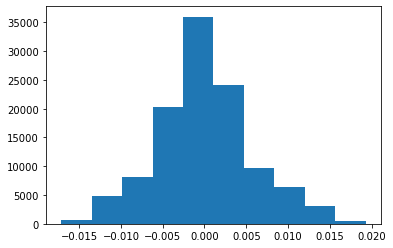

 54%|████████████████████████████████████████████▎                                     | 27/50 [03:25<02:46,  7.24s/it]

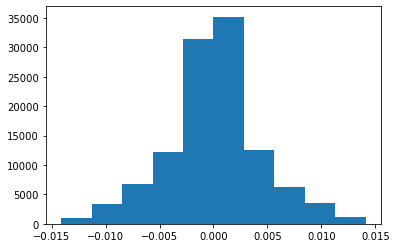

 56%|█████████████████████████████████████████████▉                                    | 28/50 [03:32<02:36,  7.13s/it]

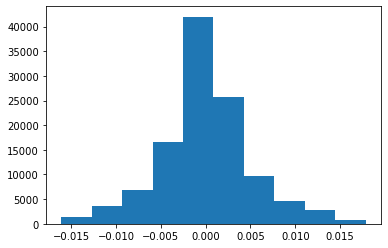

 58%|███████████████████████████████████████████████▌                                  | 29/50 [03:39<02:27,  7.04s/it]

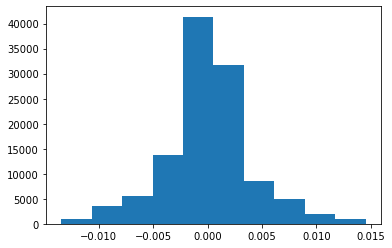

 60%|█████████████████████████████████████████████████▏                                | 30/50 [03:46<02:21,  7.07s/it]

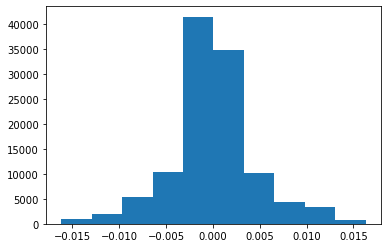

 62%|██████████████████████████████████████████████████▊                               | 31/50 [03:53<02:13,  7.02s/it]

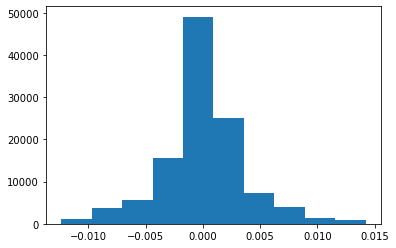

 64%|████████████████████████████████████████████████████▍                             | 32/50 [04:00<02:05,  6.95s/it]

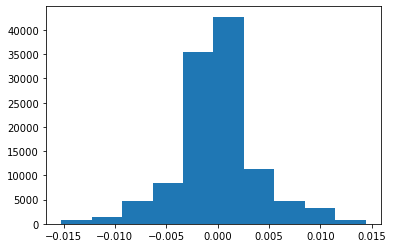

 66%|██████████████████████████████████████████████████████                            | 33/50 [04:07<01:57,  6.91s/it]

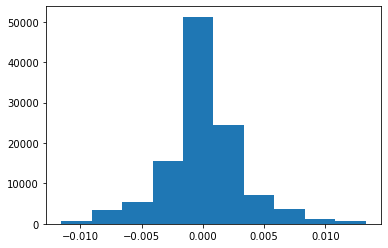

 68%|███████████████████████████████████████████████████████▊                          | 34/50 [04:14<01:50,  6.89s/it]

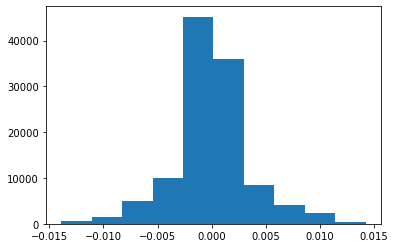

 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [04:20<01:43,  6.88s/it]

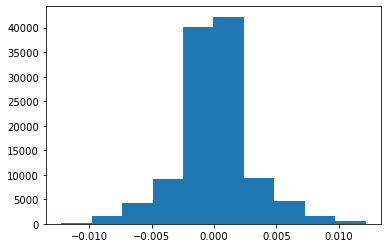

 72%|███████████████████████████████████████████████████████████                       | 36/50 [04:27<01:36,  6.88s/it]

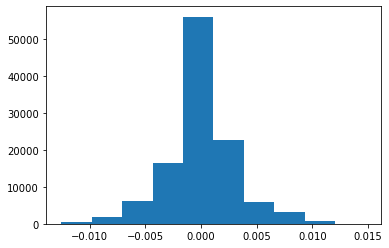

 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [04:34<01:29,  6.87s/it]

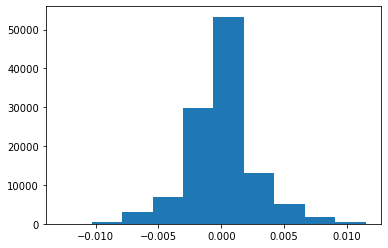

 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [04:42<01:24,  7.04s/it]

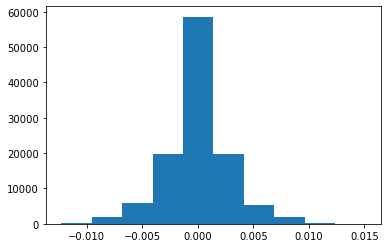

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [04:49<01:17,  7.01s/it]

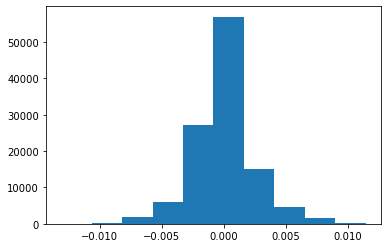

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [04:55<01:09,  6.96s/it]

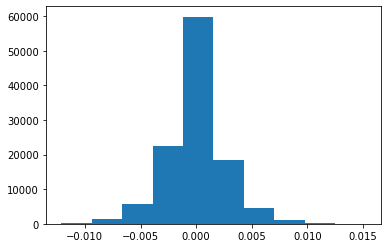

 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [05:02<01:02,  6.93s/it]

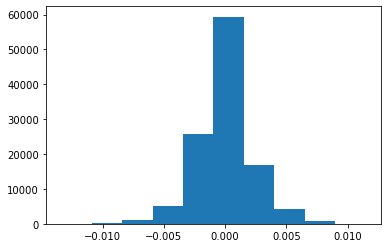

 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [05:09<00:55,  6.97s/it]

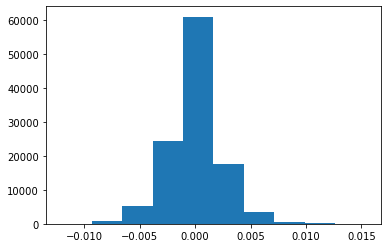

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [05:16<00:48,  6.93s/it]

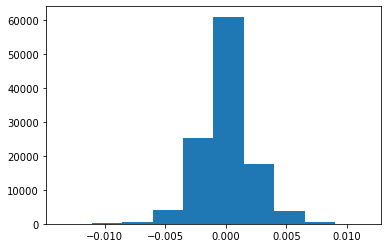

 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [05:23<00:42,  7.02s/it]

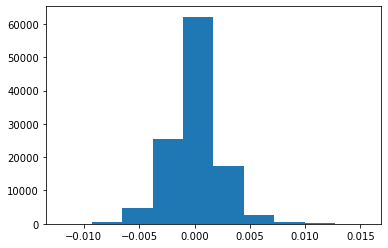

 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [05:30<00:34,  6.95s/it]

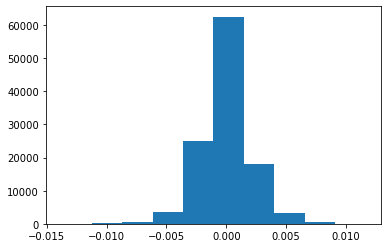

 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [05:37<00:27,  6.90s/it]

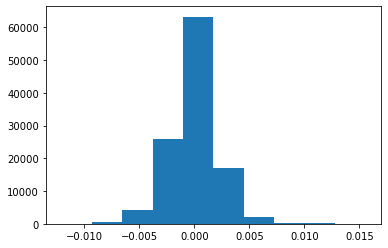

 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [05:44<00:20,  6.88s/it]

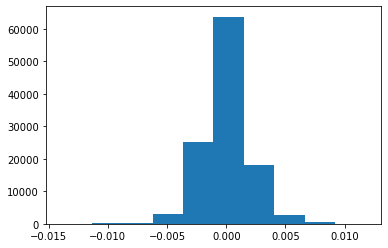

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [05:51<00:13,  6.86s/it]

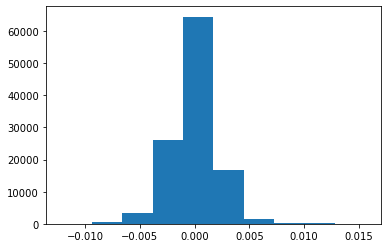

 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [05:57<00:06,  6.86s/it]

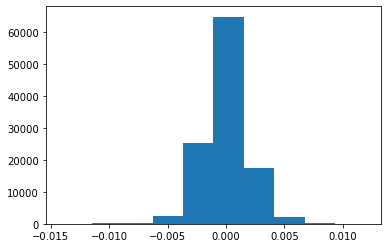

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:04<00:00,  7.29s/it]


In [4]:
"""
Area distortion relaxation 
"""
# For a single cell I like to set debugviz=True. 
# This will plot a histogram of the log area distortion and we can watch the area distortion converging to a symmetric distribution around 0. 
# If the plots don't converge it can mean your mesh was not genus-0 or the triangulation of the mesh is not isotropic with many small angles in which case an isotropic remesh is required.
relax_v, relax_f, area_distortion_iter= meshtools.area_distortion_flow_relax_sphere(conformal_sphere_mesh, 
                                                                                    S_ref_mesh, 
                                                                                    max_iter=50,
                                                                                    delta=0.1, # controls the stiffness, if too high - there is no flow, if too low - bijectivity is lost and flow may breakdown 
                                                                                    stepsize=1, 
                                                                                    debugviz=True) # the flip delaunay is not very smooth...?  

# compute the evolution of the mean area distortion. We use this to determine the first iteration when area distortion is minimized. 
area_distortion_iter_curve = np.hstack([np.mean(mm) for mm in area_distortion_iter])

# to determine when area distortion is minimised we look for the timepoint when the sign first changes. This is because once the minimum is reached, depending on stepsize, the mesh will start to oscilate. The larger the stepsize, the faster the convergence but the larger the oscillatory instability. 
min_area_distort = (np.arange(len(area_distortion_iter_curve))[:-1])[np.sign(np.diff(area_distortion_iter_curve))>0][0] # falls below 0. 


# create the equiareal mesh and save it out
equiareal_sphere_mesh = conformal_sphere_mesh.copy()
equiareal_sphere_mesh.vertices = relax_v[min_area_distort].copy()

tmp = equiareal_sphere_mesh.export(os.path.join(savefolder,
                                               'equiareal_sphere_param_Sref_%s.obj' %(basefname)))


### Quantifying and colormapping the conformal and equiareal distortion error during the relaxation

The area distortion was computed as part of the relaxation process. Here we compute the conformal error per iteration.

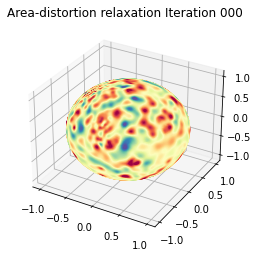

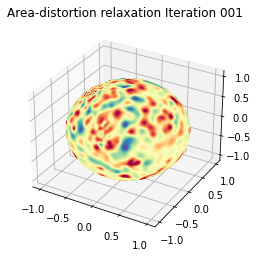

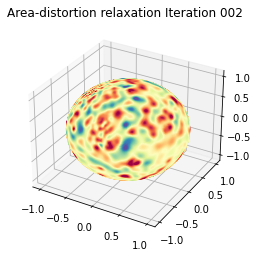

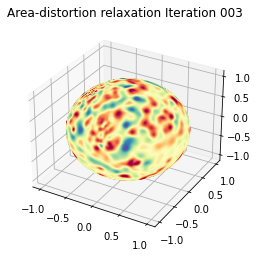

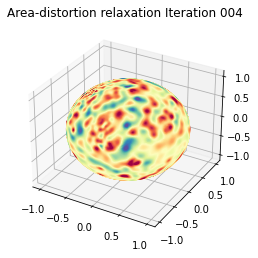

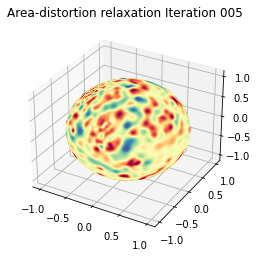

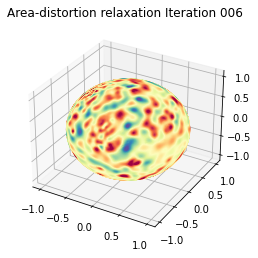

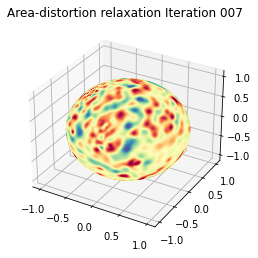

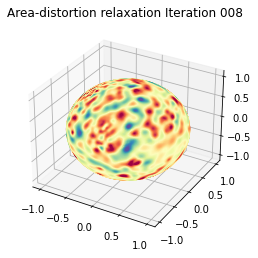

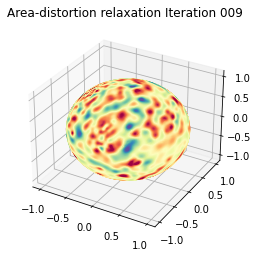

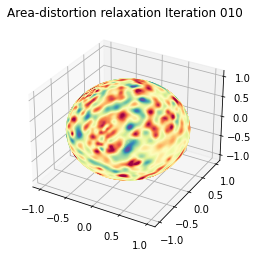

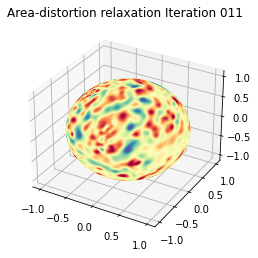

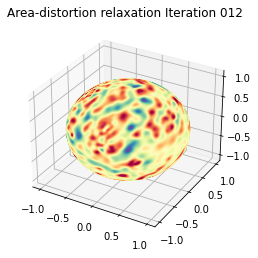

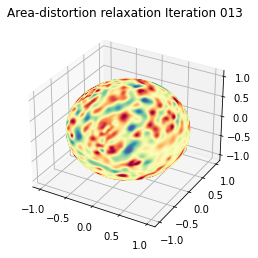

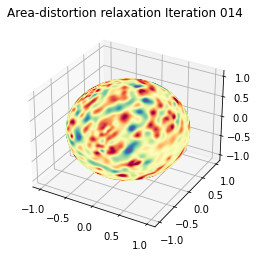

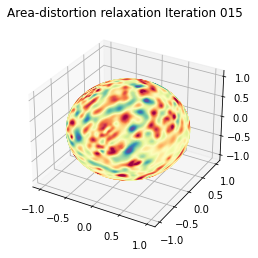

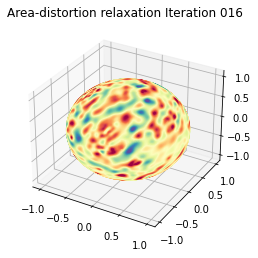

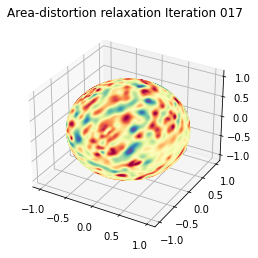

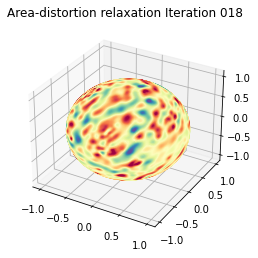

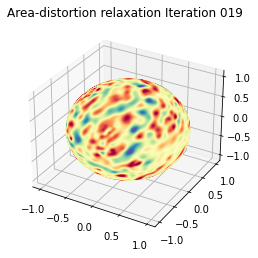

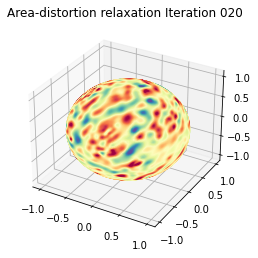

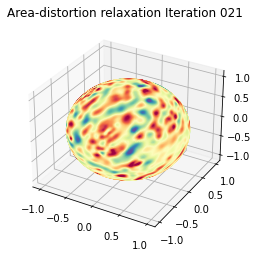

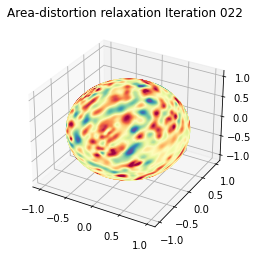

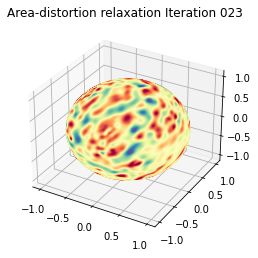

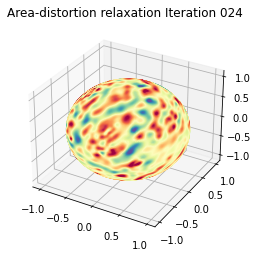

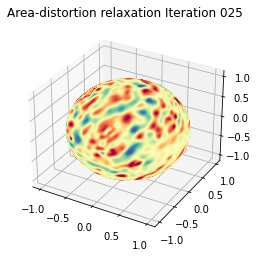

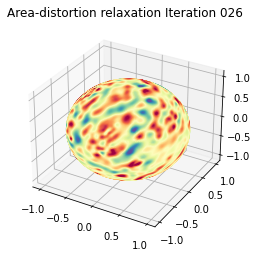

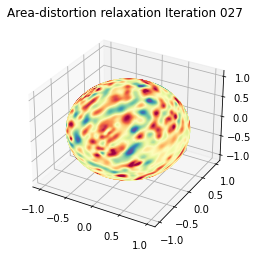

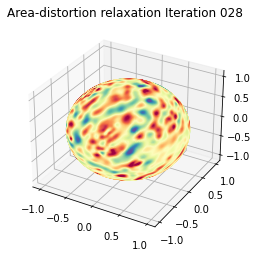

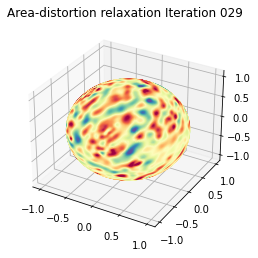

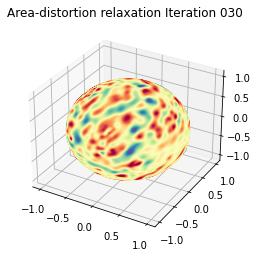

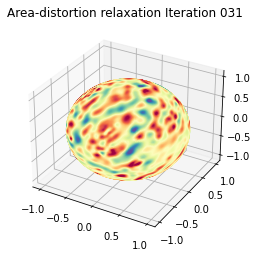

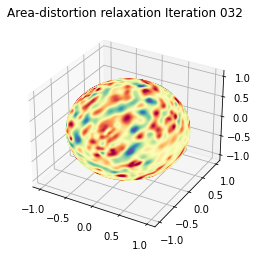

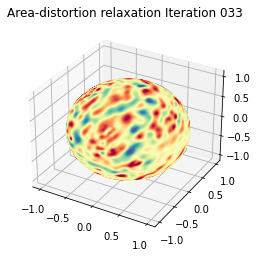

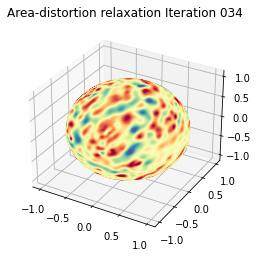

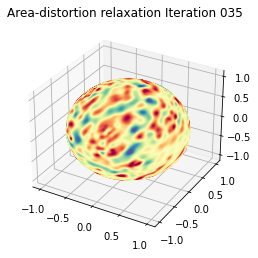

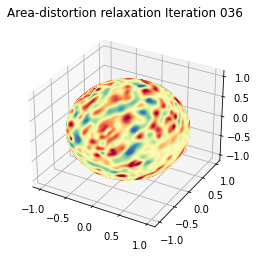

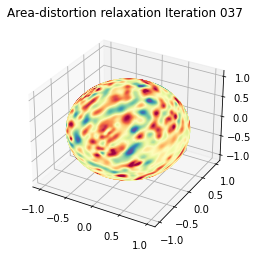

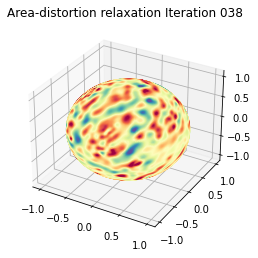

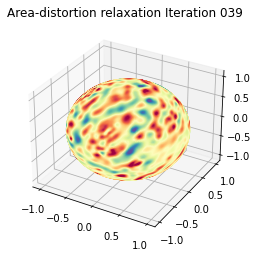

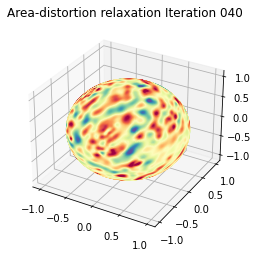

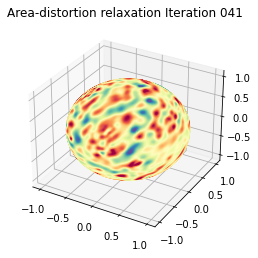

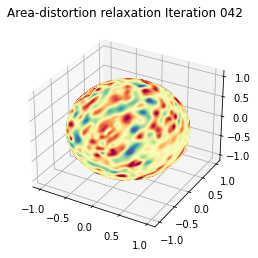

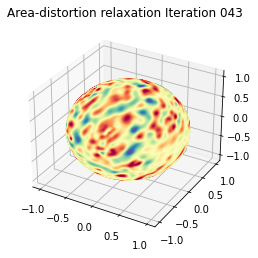

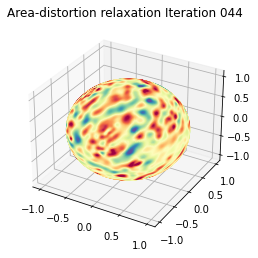

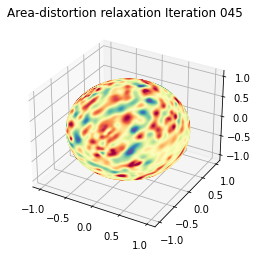

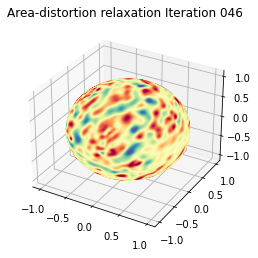

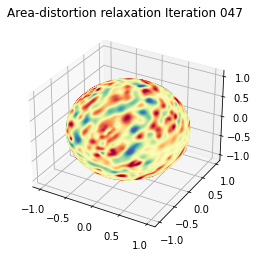

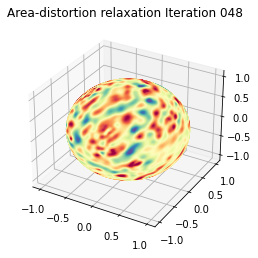

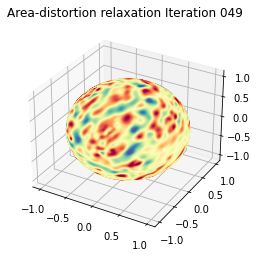

In [5]:
import unwrap3D.Visualisation.colors as vol_colors
import unwrap3D.Visualisation.plotting as plotting
from matplotlib import cm 
import pylab as plt 

"""
Compute the conformal error for each iteration of the relaxation and also color the resulting mesh. 
"""

save_area_relaxation_folder = os.path.join(savefolder, 'area_relaxation_iterations'); 
fio.mkdir(save_area_relaxation_folder)


# this will save both the conformal + equiareal error.
conformal_error_flow = []

for iter_ii in np.arange(len(area_distortion_iter)):

    # color by curvature
    relax_mesh_H = conformal_sphere_mesh.copy()
    relax_mesh_H.vertices = relax_v[iter_ii].copy()
    tmp = relax_mesh_H.export(os.path.join(save_area_relaxation_folder,
                                           'sphere_curvature_%s.obj' %(str(iter_ii).zfill(3))))

    # color by area distortion error
    area_distortion_error_colors = vol_colors.get_colors(np.log(area_distortion_iter[iter_ii]), 
                                                         colormap=cm.coolwarm, 
                                                         vmin=-3, vmax=3)
    relax_mesh_area_distort = meshtools.create_mesh(relax_v[iter_ii],
                                                    relax_f[iter_ii],
                                                    face_colors=np.uint8(255*area_distortion_error_colors[...,:3]))
    relax_mesh_area_distort.export(os.path.join(save_area_relaxation_folder,
                                                'sphere_area_distortion_%s.obj' %(str(iter_ii).zfill(3))))

    # measure and color by conformal error relative to the sphere at the start
    conformal_errors = meshtools.quasi_conformal_error(relax_v[0], 
                                                      relax_v[iter_ii], 
                                                      relax_f[iter_ii])
    conformal_error_flow.append(conformal_errors)

    conformal_error_color = vol_colors.get_colors(conformal_errors[1], # per face conformal error. 
                                                  colormap=cm.jet, 
                                                  vmin=1., vmax=1.5)
    relax_mesh_conformal_error = relax_mesh_area_distort.copy()
    relax_mesh_conformal_error.visual.face_colors = np.uint8(255*conformal_error_color)
    relax_mesh_conformal_error.export(os.path.join(save_area_relaxation_folder,
                                                   'sphere_conformal_error_%s.obj' %(str(iter_ii).zfill(3))))
    
    
    # matplotlib visualization
    sampling = 1 # plot every just so its not fully dense in the plot so we don't see anything!

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(projection='3d')
    plt.title('Area-distortion relaxation Iteration '+str(iter_ii).zfill(3))
    ax.scatter(relax_mesh_H.vertices[::sampling,2], 
               relax_mesh_H.vertices[::sampling,1],
               relax_mesh_H.vertices[::sampling,0], 
               s=1, 
               c=relax_mesh_H.visual.vertex_colors[::sampling,:3]/255.)
    plotting.set_axes_equal(ax)
    plt.show()
    
# reorganising the conformal error_flow from the relaxation process. 
conformal_error_flow_arrays = [ np.array([cc[jj] for cc in conformal_error_flow]) for jj in np.arange(len(conformal_error_flow[0]))]

Plotting the mean conformal and equiareal error at each relaxation iteration.

**NOTE**: the conformal and area distortion curves will be different from that in the paper as we are using the remeshed $S_{ref}(x,y,z)$ for illustration purposes. In the paper we didn't actually remesh this cell since it was already genus-0 and isotropically meshed.

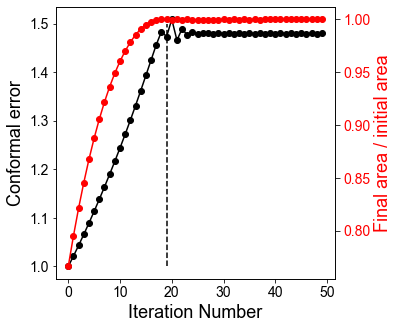

mean conformal distortion:  1.4732007147782513
mean area distortion:  0.9999402904010086


In [6]:
mean_conformal_curve = conformal_error_flow_arrays[2]
mean_area_distort_curve = np.array(area_distortion_iter).mean(axis=1)


import pylab as plt 

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.set_xlabel('Iteration Number', fontsize=18, fontname='Arial')
ax1.set_ylabel('Conformal error', fontsize=18, fontname='Arial', color='k')
ax1.plot(np.arange(len(mean_conformal_curve)), mean_conformal_curve, 'ko-')
ax1.vlines(min_area_distort,1,1.5, linestyles='dashed', color='k')
ax1.tick_params(axis='y', labelcolor='k')
plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Final area / initial area', fontsize=18, color='r', fontname='Arial')  # we already handled the x-label with ax1
ax2.plot(np.arange(len(mean_area_distort_curve)), 1./mean_area_distort_curve, 'ro-')
ax2.tick_params(axis='y', labelcolor='r')
plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)
plt.tick_params(length=5)
plt.savefig(os.path.join(savefolder,  
                        'mean_area-relax_distortion_errors_iterations_'+basefname+'.png'), 
            bbox_inches='tight', dpi=300)
plt.show()
    
    
# print the mean errors
print('mean conformal distortion: ', mean_conformal_curve[min_area_distort])
print('mean area distortion: ', np.nanmean(area_distortion_iter, axis=-1)[min_area_distort])


You will notice that there appears a tradeoff between conformal and area distortion. To make this explicit we can plot a combined 'isometric' error proposed in the paper, conformal + log(area distortion). It is then apparent that there exists a global minimum where both types of errors are minimised.

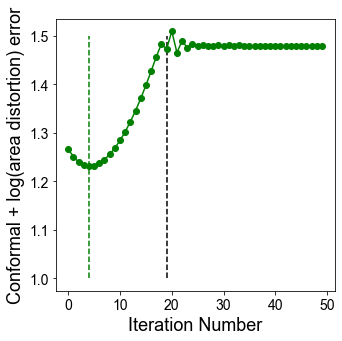

In [7]:
min_combined = np.argmin(mean_conformal_curve + np.log(mean_area_distort_curve))

# plotting combined conformal + log(area distortion) error
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel('Iteration Number', fontsize=18, fontname='Arial')
ax.set_ylabel('Conformal + log(area distortion) error', fontsize=18, fontname='Arial', color='k')
ax.plot(np.arange(len(mean_conformal_curve)), mean_conformal_curve + np.log(mean_area_distort_curve), 'go-')
ax.vlines(min_area_distort,1,1.5, linestyles='dashed', color='k') # this is the iteration number for equiareal
ax.vlines(min_combined,1,1.5, linestyles='dashed', color='g') # this is the iteration number for global minimum of conformal + equiareal
ax.tick_params(axis='y', labelcolor='k')
plt.xticks(fontname='Arial', fontsize=14)
plt.yticks(fontname='Arial', fontsize=14)
plt.show()

In [8]:
"""
Save all the computed measurements out
"""
save_sphere_parametrization_mat = os.path.join(savefolder, 
                                                'Sref_area_relax_sphere.mat')
spio.savemat(save_sphere_parametrization_mat,
              {'relax_v':np.array(relax_v), 
              'relax_f': np.array(relax_f), 
              'area_distortion_iter': np.array(area_distortion_iter), # we have this saved.... (we want also the conformal area?)
              'min_area_distort_id':min_area_distort,
              'sphere_param': conformal_sphere_mesh.vertices, 
              'conformal_Jac_eigvals': conformal_error_flow_arrays[0], 
              'conformal_stretch_factors': conformal_error_flow_arrays[1], 
              'mean_conformal_stretch_factors': conformal_error_flow_arrays[2], 
              'conformal_tri_area_pairs': conformal_error_flow_arrays[3]})


## We now proceed to step 4 notebook to uv map the equiareal parameterization onto the 2D plane ...